E-sports have been on the rise for years, among these, CSGO have been consistenly one of the most popular games on the scene. The 'rating' of a player aims to quantify it's ability and performance and, as such, it is a very interesting feature for coaches, analists, and enthusiasts.

However, the actual formula and methods used to determine this feature are currently not known. This project attemps to create a model that can predict a player rating and, hopefully, output a satisfying estimate for upcoming players (or for your own game analisys!).

In [902]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Importing data

In [903]:
# reading csv into a dataframe, without the index collumn
# csv is available at https://www.kaggle.com/patrasaurabh/csgo-player-and-team-stats

df = pd.read_csv("player_stats.csv", index_col=0)

In [904]:
# showing first rows

df.head()

,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
0,ZywOo,France,"['Vitality', 'aAa']",854,22399,5248,1.38,1.28
1,s1mple,Ukraine,"['Natus Vincere', 'FlipSid3']",1429,37717,8070,1.33,1.25
2,deko,Russia,['1WIN'],190,5096,1250,1.42,1.24
3,saffee,Brazil,['paiN'],202,5383,1211,1.37,1.24
4,sh1ro,Russia,"['Gambit', 'Gambit Youngsters']",744,19780,4593,1.43,1.22


# Data cleaning

In [905]:
df.isnull().values.any()

False

The data is doesn't contain missing values or missing/corrupted labels and does not require data cleaning.

# Exploring the data

In [906]:
# top 10 players by rating

df.head(10)

,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
0,ZywOo,France,"['Vitality', 'aAa']",854,22399,5248,1.38,1.28
1,s1mple,Ukraine,"['Natus Vincere', 'FlipSid3']",1429,37717,8070,1.33,1.25
2,deko,Russia,['1WIN'],190,5096,1250,1.42,1.24
3,saffee,Brazil,['paiN'],202,5383,1211,1.37,1.24
4,sh1ro,Russia,"['Gambit', 'Gambit Youngsters']",744,19780,4593,1.43,1.22
5,m0NESY,Russia,['NAVI Junior'],144,3687,709,1.31,1.21
6,Kaze,Malaysia,"['ViCi', 'Flash', 'MVP.karnal']",784,20459,3900,1.32,1.20
7,degster,Russia,"['Spirit', 'Spirit', 'Espada']",555,14868,2745,1.31,1.19
8,sterling,New Zealand,"['AVANT', 'Dire Wolves', 'Grayhound', 'Legacy'...",702,18010,3532,1.33,1.19
9,d4v41,Malaysia,"['BOOT', 'FrostFire', 'Fire Dragoon', 'BOOT-d[...",308,8005,1358,1.27,1.18


Using 'rating' as a feature of interest, except from 'kd', all other features span large values and would benefit from a normalization for machine learning purposes.

In [907]:
# top 10 players by kd

df.head(10).sort_values('kd', ascending=False)

,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
4,sh1ro,Russia,"['Gambit', 'Gambit Youngsters']",744,19780,4593,1.43,1.22
2,deko,Russia,['1WIN'],190,5096,1250,1.42,1.24
0,ZywOo,France,"['Vitality', 'aAa']",854,22399,5248,1.38,1.28
3,saffee,Brazil,['paiN'],202,5383,1211,1.37,1.24
1,s1mple,Ukraine,"['Natus Vincere', 'FlipSid3']",1429,37717,8070,1.33,1.25
8,sterling,New Zealand,"['AVANT', 'Dire Wolves', 'Grayhound', 'Legacy'...",702,18010,3532,1.33,1.19
6,Kaze,Malaysia,"['ViCi', 'Flash', 'MVP.karnal']",784,20459,3900,1.32,1.20
5,m0NESY,Russia,['NAVI Junior'],144,3687,709,1.31,1.21
7,degster,Russia,"['Spirit', 'Spirit', 'Espada']",555,14868,2745,1.31,1.19
9,d4v41,Malaysia,"['BOOT', 'FrostFire', 'Fire Dragoon', 'BOOT-d[...",308,8005,1358,1.27,1.18


In [908]:
# quick summary with describe()

df.describe()

,total_maps,total_rounds,kd_diff,kd,rating
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,435.231675,11399.083467,180.254147,0.996726,0.985757
std,391.291072,10298.045537,991.956591,0.100515,0.075545
min,100.000000,2348.000000,-6238.000000,0.630000,0.680000
25%,152.000000,3977.000000,-269.000000,0.930000,0.940000
50%,271.000000,7076.000000,-32.000000,0.990000,0.990000
75%,592.000000,15532.000000,352.000000,1.060000,1.030000
max,2064.000000,54137.000000,8070.000000,1.430000,1.280000


<AxesSubplot:xlabel='rating'>

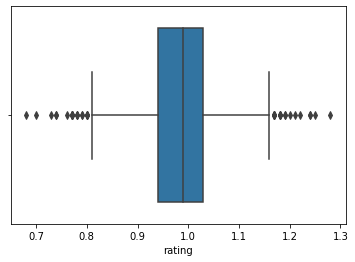

In [909]:
# boxplot of rating values

sns.boxplot(x = df['rating'])

We can see that 50% of the ratings are between the values 0.94 and 1.03, that is, in this (relatively) small interval there are half of all values.

<AxesSubplot:xlabel='rating', ylabel='Count'>

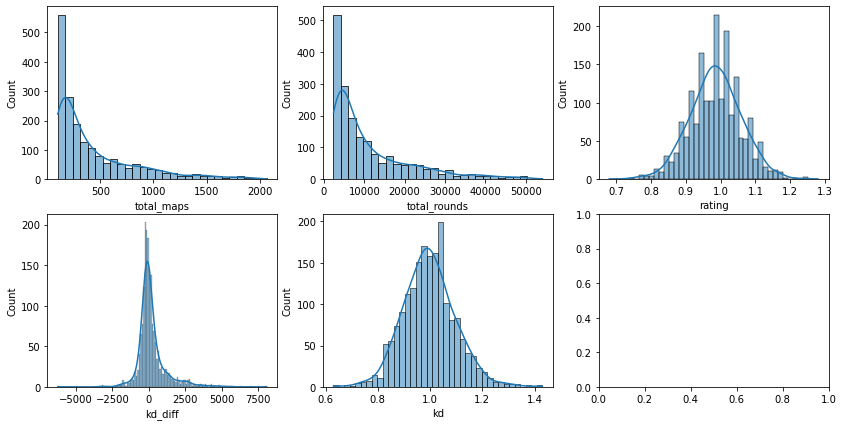

In [910]:
# Plotting a histogram of the numeric features

fig, axs = plt.subplots(2, 3, figsize=(14, 7))

sns.histplot(df['total_maps'],kde=True,ax=axs[0, 0])
sns.histplot(df['total_rounds'],kde=True,ax=axs[0, 1])
sns.histplot(df['kd_diff'],kde=True,ax=axs[1, 0])
sns.histplot(df['kd'],kde=True,ax=axs[1, 1])
sns.histplot(df['rating'],kde=True,ax=axs[0, 2])

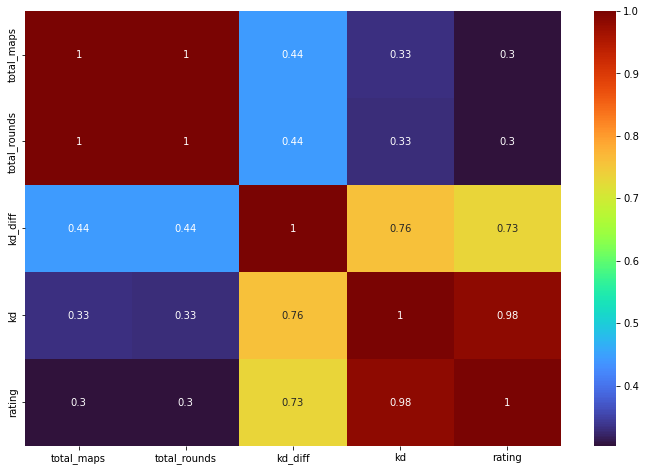

In [911]:
# correlation heatmap of features

plt.figure(figsize=(12,8))
dataplot = sns.heatmap(df.corr(), cmap="turbo", annot=True)
plt.show()

<AxesSubplot:xlabel='kd', ylabel='rating'>

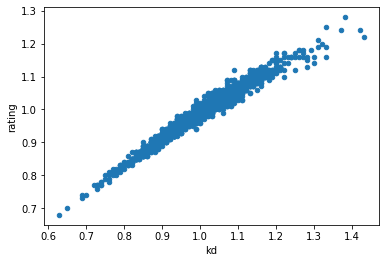

In [912]:
#kd: kill/death, diff: differential
 
df.plot(x='kd', y='rating', kind='scatter')

We can see that 'kd' and 'rating' have a very strong correlation

# Feature Engineering

total_maps and total_rounds are proportional and have the same correlation to 'rating' so we will use only 'total_maps'

In [913]:
df = df.drop(['total_rounds'],axis=1)

Making power transforms and scaling of 'total_maps' given that 'rating' varies between small values (0.68 to 1.28)

In [914]:
# log and Box-Cox power transforms

df['log_total_maps'] = np.log10(df['total_maps'] + 1)

from scipy import stats

df['bc_total_maps'] = stats.boxcox(df['total_maps'], lmbda=2)

In [915]:
# min-max scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max_scaler = MinMaxScaler()
df[["total_maps"]] = min_max_scaler.fit_transform(df[["total_maps"]])

<AxesSubplot:xlabel='bc_total_maps', ylabel='Count'>

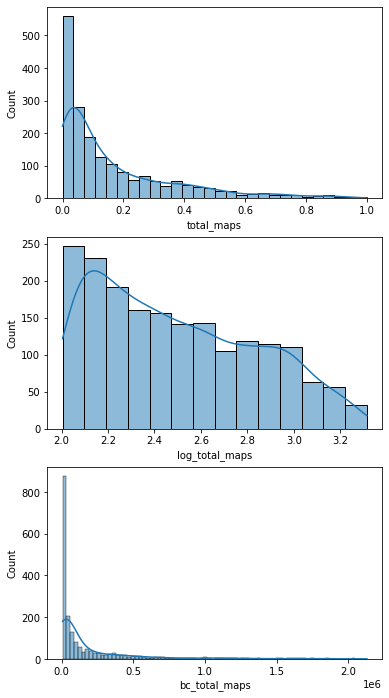

In [916]:
# comparing the histogram of total_maps and the transforms

fig, axs = plt.subplots(3, 1, figsize=(6, 12))

sns.histplot(df['total_maps'],kde=True,ax=axs[0])
sns.histplot(df['log_total_maps'],kde=True,ax=axs[1])
sns.histplot(df['bc_total_maps'],kde=True,ax=axs[2])

We can see that the log transformg gives more weight to values that are not observed often, however the box-cox transform exagerates the difference and gives more weight to values close to zero (that are observed more often) and, therefore, more useful for machine learning purposes.

In [917]:
# Scaling kd_diff for the same reasons listed to total_maps

df[["kd_diff"]] = min_max_scaler.fit_transform(df[["kd_diff"]])

<AxesSubplot:xlabel='kd_diff', ylabel='Count'>

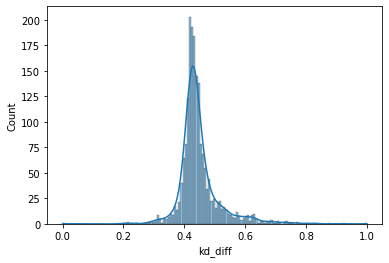

In [918]:
sns.histplot(df['kd_diff'],kde=True)

In [919]:
# Creating a new dataframe to deal with categorical data

In [920]:
df2 = df.drop(['country','log_total_maps','total_maps'],axis=1)

In [921]:
# Using Dummy Variable Encoding for categorical data (e.g. country and teams) 

In [922]:
dummy_country = pd.get_dummies(df['country'])

In [923]:
df2 = pd.concat([df2,dummy_country],axis=1)

In [924]:
# creating one hot encoding for a collumn that has list values

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)
df2 = df2.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df2.pop('teams')),
                index=df.index,
                columns=mlb.classes_))

# Implementing Linear Regression Model

## a) Model with only given numerical values (with bc_total_maps, kd_diff and kd)

In [925]:
X = df[['bc_total_maps','kd_diff','kd']]
Y = df[['rating']]

In [926]:
reg = linear_model.LinearRegression()

x_train,x_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [927]:
reg.fit(x_train,y_train);

In [928]:
y_pred = reg.predict(x_test)

In [929]:
# printing metrics of the model

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.01135212511615739
Mean Squared Error: 0.00023406550997526866
Root Mean Squared Error: 0.01529919965146114


In [930]:
# printing accuracy of the model

from sklearn.metrics import accuracy_score

a = reg.score(x_test, y_test)
print(a)

0.9640375961698338


## b) Model using numerical and categorical data (aka 'country' and 'team')

In [931]:
X = df2.drop(['rating','name'],axis=1)
Y = df2[['rating']]

In [932]:
reg = linear_model.LinearRegression()

x_train,x_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [933]:
reg.fit(x_train,y_train);

/home/jetpackbarry/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [934]:
y_pred = reg.predict(x_test)

/home/jetpackbarry/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [935]:
# printing metrics of the model

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.011815096417054232
Mean Squared Error: 0.0002578873996867567
Root Mean Squared Error: 0.016058872927038084


In [936]:
# printing accuracy of the model

from sklearn.metrics import accuracy_score

b = reg.score(x_test, y_test)
print(b)

0.9603775421196119


/home/jetpackbarry/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


## c) Model without total_maps and total_rounds

In [937]:
X = df[['kd_diff','kd']]
Y = df[['rating']]

In [938]:
reg = linear_model.LinearRegression()

x_train,x_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [939]:
reg.fit(x_train,y_train);

In [940]:
y_pred = reg.predict(x_test)

In [941]:
# printing metrics of the model

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.01133174514089897
Mean Squared Error: 0.00023350679894281156
Root Mean Squared Error: 0.015280929256521397


In [942]:
# printing accuracy of the model

from sklearn.metrics import accuracy_score

c = reg.score(x_test, y_test)
print(c)

0.964123437914633


## d) DummyRegressor for comparison

In [943]:
from sklearn.dummy import DummyRegressor

In [944]:
# using the 0.75 quantile as strategy

dummy_clf = DummyRegressor(strategy="quantile",quantile=0.75)
dummy_clf.fit(x_train, y_train);

In [945]:
dummy_pred = dummy_clf.predict(x_test)

In [946]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dummy_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dummy_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, dummy_pred)))

Mean Absolute Error: 0.07168449197860964
Mean Squared Error: 0.008145187165775404
Root Mean Squared Error: 0.09025069066647304


In [947]:
d = dummy_clf.score(X,Y)
print(d)

-0.3431663521527053


# Comparing the models

In [948]:
print('Precision:',
     '\n a)',a,
     '\n b)',b,
     '\n c)',c,
     '\n d)',d)

Precision: 
 a) 0.9640375961698338 
 b) 0.9603775421196119 
 c) 0.964123437914633 
 d) -0.3431663521527053


The most precise model only uses kd_diff and kd (model c).